In [25]:
import csv
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from pprint import pprint

In [34]:
path = 'Advertising.csv'
data = pd.read_csv(path)    # TV、Radio、Newspaper、Sales
x = data[['TV', 'Radio', 'Newspaper']]
# x = data[['TV', 'Radio']]
y = data['Sales']

In [27]:
mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False

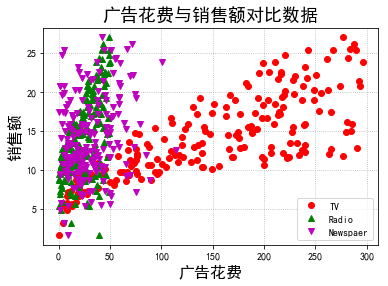

In [28]:
# 绘制1
plt.figure(facecolor='w')
plt.plot(data['TV'], y, 'ro', label='TV')
plt.plot(data['Radio'], y, 'g^', label='Radio')
plt.plot(data['Newspaper'], y, 'mv', label='Newspaer')
plt.legend(loc='lower right')
plt.xlabel('广告花费', fontsize=16)
plt.ylabel('销售额', fontsize=16)
plt.title('广告花费与销售额对比数据', fontsize=18)
plt.grid(b=True, ls=':')
plt.show()

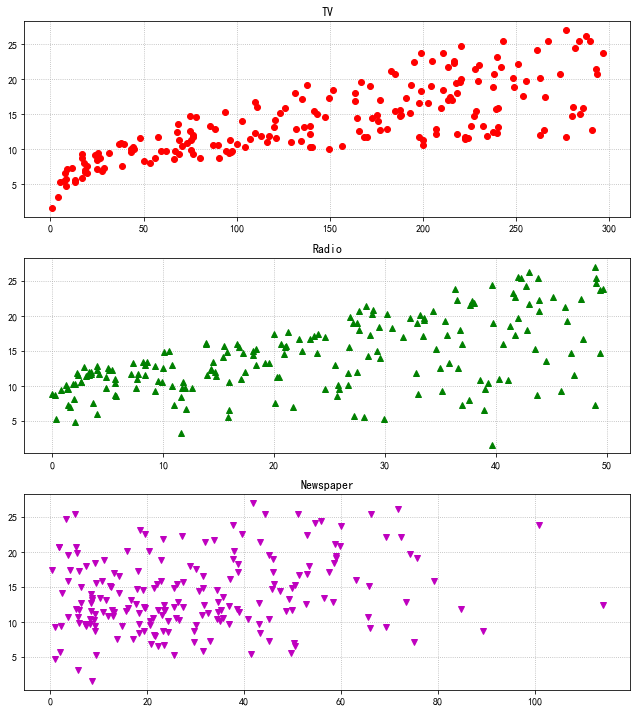

In [29]:
# 绘制2
plt.figure(facecolor='w', figsize=(9, 10))
plt.subplot(311)
plt.plot(data['TV'], y, 'ro')
plt.title('TV')
plt.grid(b=True, ls=':')
plt.subplot(312)
plt.plot(data['Radio'], y, 'g^')
plt.title('Radio')
plt.grid(b=True, ls=':')
plt.subplot(313)
plt.plot(data['Newspaper'], y, 'mv')
plt.title('Newspaper')
plt.grid(b=True, ls=':')
plt.tight_layout()
plt.show()

In [30]:
# 训练
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [31]:
print(type(x_test))
print(x_train.shape, y_train.shape)

<class 'pandas.core.frame.DataFrame'>
(160, 3) (160,)


In [32]:
linreg = LinearRegression()
model = linreg.fit(x_train, y_train)
print(model)
print(linreg.coef_, linreg.intercept_)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
[ 0.0468431   0.17854434  0.00258619] 2.90794702082


In [33]:
order = y_test.argsort(axis=0) # 从小到大排序，返回序号
y_test = y_test.values[order]
x_test = x_test.values[order, :]
y_hat = linreg.predict(x_test)
mse = np.average((y_hat - np.array(y_test)) ** 2)  # Mean Squared Error
rmse = np.sqrt(mse)  # Root Mean Squared Error
print('MSE = ', mse, end=' ')
print('RMSE = ', rmse)
print('R2 = ', linreg.score(x_train, y_train))
print('R2 = ', linreg.score(x_test, y_test))

MSE =  1.99188555183 RMSE =  1.41134175586
R2 =  0.895937263233
R2 =  0.892760591462


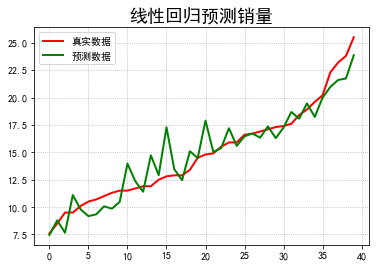

In [35]:
plt.figure(facecolor='w')
t = np.arange(len(x_test))
plt.plot(t, y_test, 'r-', linewidth=2, label='真实数据')
plt.plot(t, y_hat, 'g-', linewidth=2, label='预测数据')
plt.legend(loc='upper left')
plt.title('线性回归预测销量', fontsize=18)
plt.grid(b=True, ls=':')
plt.show()